In [0]:
# Reference

# https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
# https://blog.csdn.net/baidu_36669549/article/details/85595807

# 下載資料並命名為power_usage_data.csv

In [2]:
!wget -c http://data.taipower.com.tw/opendata/apply/file/d006005/%E5%8F%B0%E7%81%A3%E9%9B%BB%E5%8A%9B%E5%85%AC%E5%8F%B8_%E9%81%8E%E5%8E%BB%E9%9B%BB%E5%8A%9B%E4%BE%9B%E9%9C%80%E8%B3%87%E8%A8%8A.csv -O power_usage_data.csv

--2019-04-01 11:03:07--  http://data.taipower.com.tw/opendata/apply/file/d006005/%E5%8F%B0%E7%81%A3%E9%9B%BB%E5%8A%9B%E5%85%AC%E5%8F%B8_%E9%81%8E%E5%8E%BB%E9%9B%BB%E5%8A%9B%E4%BE%9B%E9%9C%80%E8%B3%87%E8%A8%8A.csv
Resolving data.taipower.com.tw (data.taipower.com.tw)... 175.98.140.48, 175.98.139.48, 2001:4542:1056:200::48, ...
Connecting to data.taipower.com.tw (data.taipower.com.tw)|175.98.140.48|:80... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.



# 載入pytorch 及其它套件

In [0]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sys
import time
import numpy as np
import math
import pandas as pd
from datetime import datetime
from torch.autograd import Variable
import random


# 讀取 power_usage_data.csv

In [4]:
try:
    df = pd.read_csv('power_usage_data.csv')  
    print("Load file success")
except:
    print("Load file faild!")
    sys.exit(0)


Load file success


# 載入『尖峰負載(MW)』資料並繪製



424


Text(0.5, 1.0, 'peak (MW)')

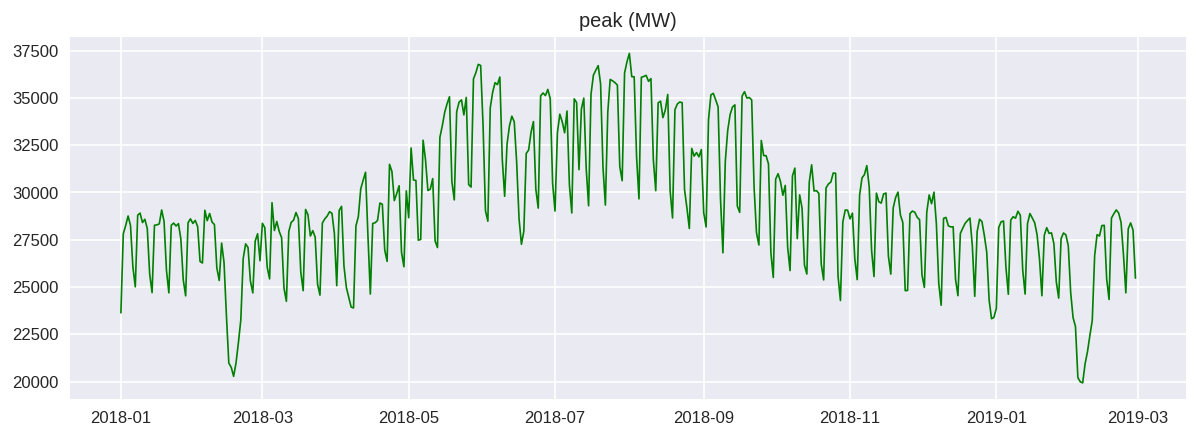

In [5]:
num = np.array(df.iloc[0:,0])                                  #date
net_peak = np.array(df.iloc[1:,1]).astype(np.float)            #net peak

peak = np.array(df.iloc[0:,2]).astype(np.float)                #peak

operating_reserve = np.array(df.iloc[1:,3]).astype(np.float)   #Operating Reserve
P_operating_reserve = np.array(df.iloc[1:,4]).astype(np.float) #Percent Operating Reserve
industry_useage = np.array(df.iloc[1:,5]).astype(np.float)     #industry useage
house_useage = np.array(df.iloc[1:,6]).astype(np.float)        #industry useage


num_t = [datetime.strptime(format(nums), '%Y%m%d').date() for nums in num]

print(len(num_t))



fig_plot = plt.figure(figsize=(12,4),dpi=120)
ax1 = fig_plot.add_subplot(1,1,1)


ax1.plot(num_t, peak, lw=1, c='g')
ax1.set_title('peak (MW)')

# 切割週一到週日成每週的數據

In [6]:
#seperate in 7 days
peak1 = []
peak2 = []
peak3 = []
peak4 = []
peak5 = []
peak6 = []
peak7 = []

for i in range(len(num_t)):
  if(i%7==0):
    peak1 = np.append(peak1,peak[i])
  elif(i%7==1):
    peak2 = np.append(peak2,peak[i])
  elif(i%7==2):
    peak3 = np.append(peak3,peak[i])
  elif(i%7==3):
    peak4 = np.append(peak4,peak[i])
  elif(i%7==4):
    peak5 = np.append(peak5,peak[i])
  elif(i%7==5):
    peak6 = np.append(peak6,peak[i])
  elif(i%7==6):
    peak7 = np.append(peak7,peak[i])



print(peak1)

[23638. 28801. 28269. 28264. 28397. 29059. 27324. 22071. 27435. 29460.
 27935. 29102. 28383. 29047. 28232. 28365. 31487. 30086. 32762. 32914.
 34269. 36007. 34478. 32557. 27948. 35108. 33151. 34951. 35178. 34239.
 36318. 36089. 34739. 34375. 32329. 33843. 31645. 35098. 27223. 30707.
 30873. 30538. 30240. 28439. 29866. 29963. 29184. 28884. 28963. 28631.
 27835. 27928. 23399. 28536. 28348. 27739. 27557. 20214. 26667. 28645.
 28084.]


# 去除異常資料
當 A[ i ]與 A[ i+1 ]相差大於4000，則A[ i+1 ] = ( A[ i ] + A[ i+1 ] ) / 2

In [0]:
#print(len(peak1))

offset = 4000

for i in range(len(peak1)-1):
  if (abs(peak1[i]-peak1[i+1])>offset):
    peak1[i+1] = (peak1[i]+peak1[i+1])/2.

for i in range(len(peak2)-1):
  if (abs(peak2[i]-peak2[i+1])>offset):
    peak2[i+1] = (peak2[i]+peak2[i+1])/2.
  #print(i)
    

for i in range(len(peak3)-1):
  if (abs(peak3[i]-peak3[i+1])>offset):
    peak3[i+1] = (peak3[i]+peak3[i+1])/2.    
    
for i in range(len(peak4)-1):
  if (abs(peak4[i]-peak4[i+1])>offset):
    peak4[i+1] = (peak4[i]+peak4[i+1])/2.
    
    
for i in range(len(peak5)-1):
  if (abs(peak5[i]-peak5[i+1])>offset):
    peak5[i+1] = (peak5[i]+peak5[i+1])/2.
    
    
for i in range(len(peak6)-1):
  if (abs(peak6[i]-peak6[i+1])>offset):
    peak6[i+1] = (peak6[i]+peak6[i+1])/2.
    
    
for i in range(len(peak7)-1):
  if (abs(peak7[i]-peak7[i+1])>offset):
    peak7[i+1] = (peak7[i]+peak7[i+1])/2.
    

# 定義正交化函式

# 定義逆正交化函式

In [0]:
def max_min_normalization(x):
    return np.array([(float(i)-min(x))/float(max(x)-min(x)) for i in x])
  
def de_normalization(original,x):
    return float(x)*(float(max(original)-min(original)))+min(original)

In [0]:
Peak1 = peak1
Peak2 = peak2
Peak3 = peak3
Peak4 = peak4
Peak5 = peak5
Peak6 = peak6
Peak7 = peak7


# 正交化

In [0]:

peak1 = max_min_normalization(peak1)
peak2 = max_min_normalization(peak2)
peak3 = max_min_normalization(peak3)
peak4 = max_min_normalization(peak4)
peak5 = max_min_normalization(peak5)
peak6 = max_min_normalization(peak6)
peak7 = max_min_normalization(peak7)
# #print(type(peak1))

# 繪製7天圖表


Text(0.5, 1.0, 'peak7 (MW)')

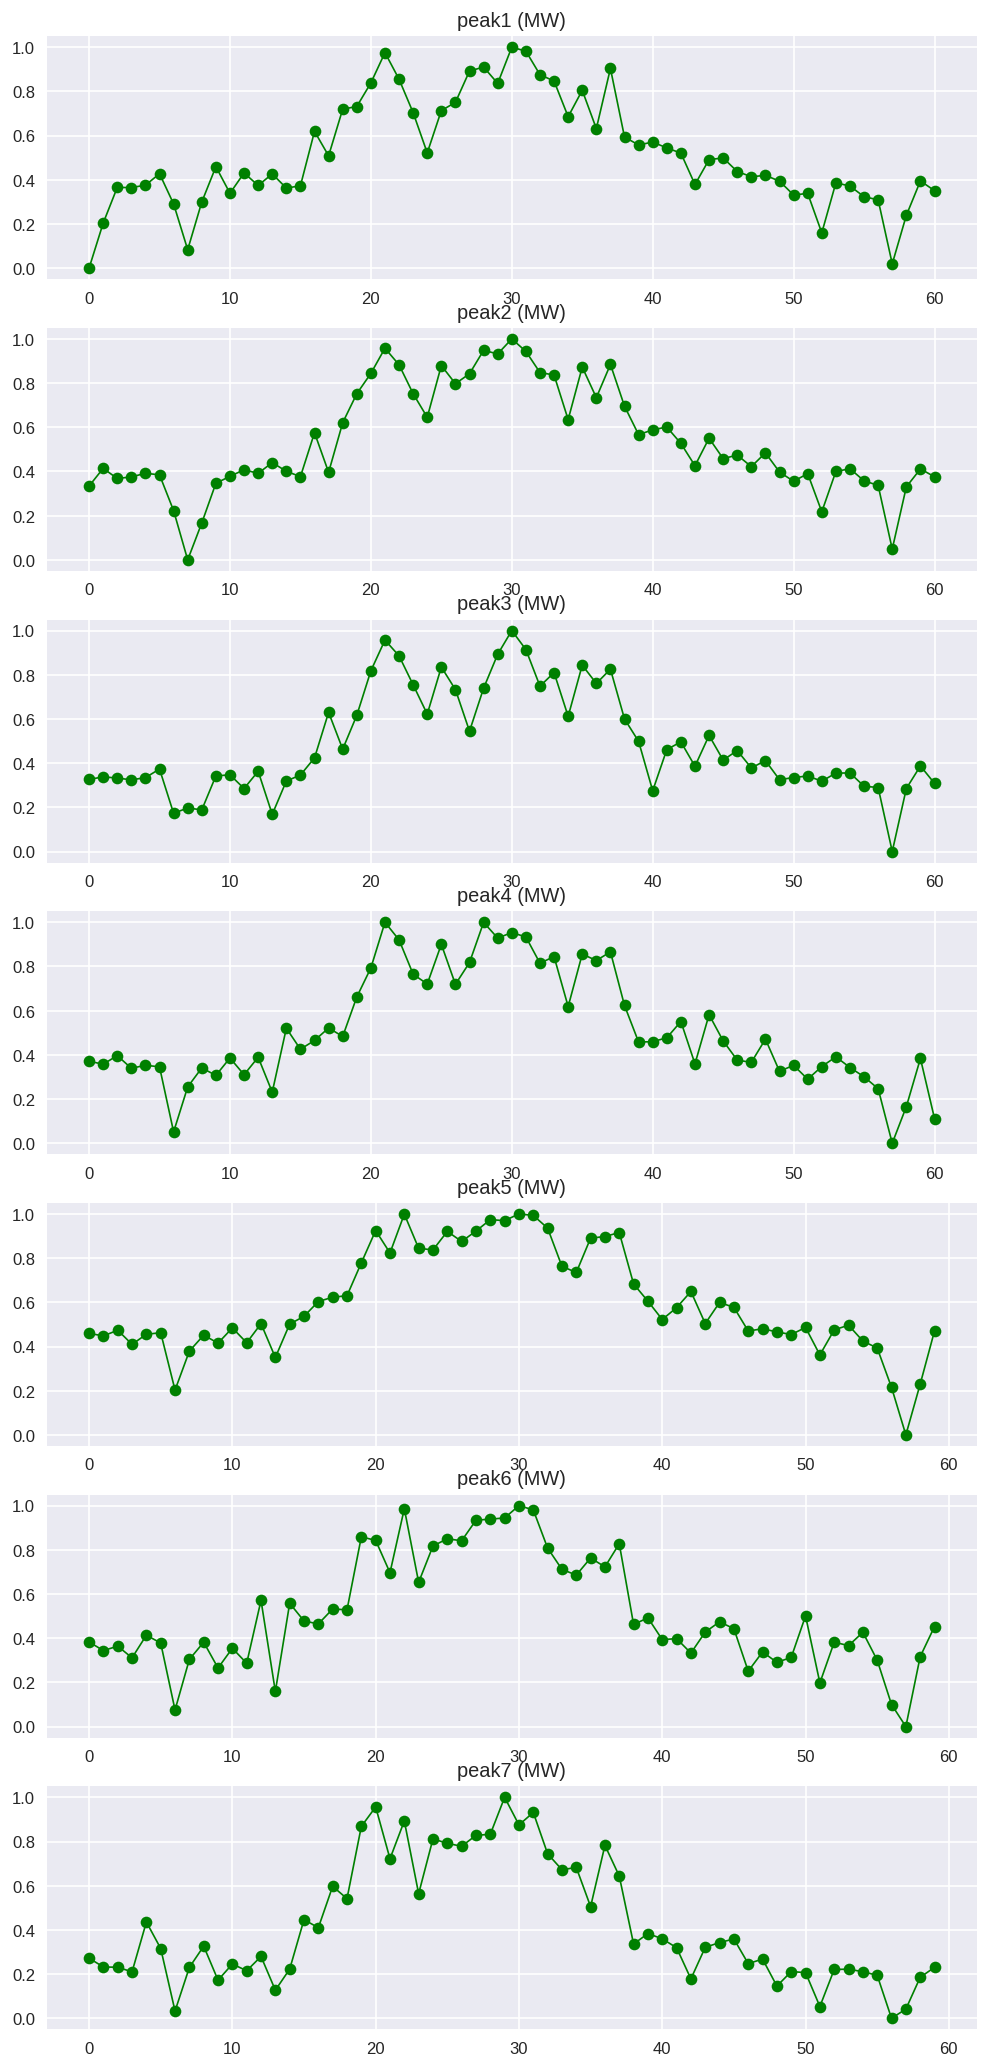

In [11]:
fig = plt.figure(figsize=(10,22),dpi=120)
ax1 = fig.add_subplot(7,1,1)
ax2 = fig.add_subplot(7,1,2)
ax3 = fig.add_subplot(7,1,3)
ax4 = fig.add_subplot(7,1,4)
ax5 = fig.add_subplot(7,1,5)
ax6 = fig.add_subplot(7,1,6)
ax7 = fig.add_subplot(7,1,7)

ax1.plot(peak1, lw=1, c='g', marker='o')
ax1.set_title('peak1 (MW)')

ax2.plot(peak2, lw=1, c='g', marker='o')
ax2.set_title('peak2 (MW)')

ax3.plot(peak3, lw=1, c='g', marker='o')
ax3.set_title('peak3 (MW)')

ax4.plot(peak4, lw=1, c='g', marker='o')
ax4.set_title('peak4 (MW)')

ax5.plot(peak5, lw=1, c='g', marker='o')
ax5.set_title('peak5 (MW)')

ax6.plot(peak6, lw=1, c='g', marker='o')
ax6.set_title('peak6 (MW)')

ax7.plot(peak7, lw=1, c='g', marker='o')
ax7.set_title('peak7 (MW)')


# Convert a Time Series to a Supervised Learning Problem


[Reference1](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/)

[Reference2](https://blog.csdn.net/baidu_36669549/article/details/85595807)


In [0]:
def create_dataset(dataset,on,look_back=2):
    dataX, dataY=[], []
    for i in range(len(dataset)-look_back):
        a=dataset[i:(i+look_back)]
        dataX.append(a)
        
        #dataX.append()
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)

In [0]:
train_X1 ,train_Y1 = create_dataset(peak1.reshape(len(peak1),1),2)

train_x1 = train_X1.reshape(-1,1,2)
train_y1 = train_Y1.reshape(-1,1,1)


train_X2 ,train_Y2 = create_dataset(peak2.reshape(len(peak2),1),2)

train_x2 = train_X2.reshape(-1,1,2)
train_y2 = train_Y2.reshape(-1,1,1)


train_X3 ,train_Y3 = create_dataset(peak3.reshape(len(peak3),1),2)

train_x3 = train_X3.reshape(-1,1,2)
train_y3 = train_Y3.reshape(-1,1,1)


train_X4 ,train_Y4 = create_dataset(peak4.reshape(len(peak4),1),2)

train_x4 = train_X4.reshape(-1,1,2)
train_y4 = train_Y4.reshape(-1,1,1)


train_X5 ,train_Y5 = create_dataset(peak5.reshape(len(peak5),1),2)

train_x5 = train_X5.reshape(-1,1,2)
train_y5 = train_Y5.reshape(-1,1,1)


train_X6 ,train_Y6 = create_dataset(peak6.reshape(len(peak6),1),2)

train_x6 = train_X6.reshape(-1,1,2)
train_y6 = train_Y6.reshape(-1,1,1)


train_X7 ,train_Y7 = create_dataset(peak7.reshape(len(peak7),1),2)

train_x7 = train_X7.reshape(-1,1,2)
train_y7 = train_Y7.reshape(-1,1,1)

# 設為tensor

In [0]:
train_x1 = Variable(torch.from_numpy(train_x1)).float()
train_y1 = Variable(torch.from_numpy(train_y1)).float()

train_x2 = Variable(torch.from_numpy(train_x2)).float()
train_y2 = Variable(torch.from_numpy(train_y2)).float()

train_x3 = Variable(torch.from_numpy(train_x3)).float()
train_y3 = Variable(torch.from_numpy(train_y3)).float()

train_x4 = Variable(torch.from_numpy(train_x4)).float()
train_y4 = Variable(torch.from_numpy(train_y4)).float()

train_x5 = Variable(torch.from_numpy(train_x5)).float()
train_y5 = Variable(torch.from_numpy(train_y5)).float()

train_x6 = Variable(torch.from_numpy(train_x6)).float()
train_y6 = Variable(torch.from_numpy(train_y6)).float()

train_x7 = Variable(torch.from_numpy(train_x7)).float()
train_y7 = Variable(torch.from_numpy(train_y7)).float()


# LSTM nn

In [0]:
class lstm_reg(torch.nn.Module):
  
  def __init__(self,input_size,hidden_size, output_size=1,num_layers=2):
    super(lstm_reg,self).__init__()

    self.rnn = torch.nn.LSTM(input_size,hidden_size,num_layers)
    self.reg = torch.nn.Linear(hidden_size,output_size)

  def forward(self,x):
    x, _ = self.rnn(x)
    s,b,h = x.shape
    x = x.view(s*b, h)
    x = self.reg(x)
    x = x.view(s,b,-1)
    return x

# 訓練週一至週日，各 10000 epoch

In [0]:
net1 = lstm_reg(2,8).cuda()
net2 = lstm_reg(2,8).cuda()
net3 = lstm_reg(2,8).cuda()
net4 = lstm_reg(2,8).cuda()
net5 = lstm_reg(2,8).cuda()
net6 = lstm_reg(2,8).cuda()
net7 = lstm_reg(2,8).cuda()
 
criterion = torch.nn.MSELoss()
optimizer1 = torch.optim.Adam(net1.parameters(),lr=1e-2)
optimizer2 = torch.optim.Adam(net2.parameters(),lr=1e-2)
optimizer3 = torch.optim.Adam(net3.parameters(),lr=1e-2)
optimizer4 = torch.optim.Adam(net4.parameters(),lr=1e-2)
optimizer5 = torch.optim.Adam(net5.parameters(),lr=1e-2)
optimizer6 = torch.optim.Adam(net6.parameters(),lr=1e-2)
optimizer7 = torch.optim.Adam(net7.parameters(),lr=1e-2)

In [0]:
EPOCH = 10000

In [18]:
for e in range(EPOCH):
  var_x1 = Variable(train_x1).cuda()
  var_y1 = Variable(train_y1).cuda()

  out = net1(var_x1)
  loss = criterion(out, var_y1)

  optimizer1.zero_grad()
  loss.backward()
  optimizer1.step()
  if (e+1)%500 == 0:
      print('Epoch: {}, Loss:{:.5f}'.format(e+1, loss.data.cpu()))  

Epoch: 500, Loss:0.00375
Epoch: 1000, Loss:0.00095
Epoch: 1500, Loss:0.00018
Epoch: 2000, Loss:0.00003
Epoch: 2500, Loss:0.00064
Epoch: 3000, Loss:0.00000
Epoch: 3500, Loss:0.00000
Epoch: 4000, Loss:0.00001
Epoch: 4500, Loss:0.00003
Epoch: 5000, Loss:0.00000
Epoch: 5500, Loss:0.00001
Epoch: 6000, Loss:0.00000
Epoch: 6500, Loss:0.00000
Epoch: 7000, Loss:0.00046
Epoch: 7500, Loss:0.00004
Epoch: 8000, Loss:0.00005
Epoch: 8500, Loss:0.00000
Epoch: 9000, Loss:0.00004
Epoch: 9500, Loss:0.00000
Epoch: 10000, Loss:0.00000


In [19]:
for e in range(EPOCH):
  var_x2 = Variable(train_x2).cuda()
  var_y2 = Variable(train_y2).cuda()

  out = net2(var_x2)
  loss = criterion(out, var_y2)

  optimizer2.zero_grad()
  loss.backward()
  optimizer2.step()
  if (e+1)%500 == 0:
      print('Epoch: {}, Loss:{:.5f}'.format(e+1, loss.data.cpu()))  

Epoch: 500, Loss:0.00156
Epoch: 1000, Loss:0.00008
Epoch: 1500, Loss:0.00000
Epoch: 2000, Loss:0.00000
Epoch: 2500, Loss:0.00000
Epoch: 3000, Loss:0.00000
Epoch: 3500, Loss:0.00000
Epoch: 4000, Loss:0.00021
Epoch: 4500, Loss:0.00000
Epoch: 5000, Loss:0.00215
Epoch: 5500, Loss:0.00004
Epoch: 6000, Loss:0.00001
Epoch: 6500, Loss:0.00001
Epoch: 7000, Loss:0.00000
Epoch: 7500, Loss:0.00000
Epoch: 8000, Loss:0.00000
Epoch: 8500, Loss:0.00002
Epoch: 9000, Loss:0.00000
Epoch: 9500, Loss:0.00000
Epoch: 10000, Loss:0.00001


In [20]:
for e in range(EPOCH):
  var_x3 = Variable(train_x3).cuda()
  var_y3 = Variable(train_y3).cuda()

  out = net3(var_x3)
  loss = criterion(out, var_y3)

  optimizer3.zero_grad()
  loss.backward()
  optimizer3.step()
  if (e+1)%500 == 0:
      print('Epoch: {}, Loss:{:.5f}'.format(e+1, loss.data.cpu()))  

Epoch: 500, Loss:0.00488
Epoch: 1000, Loss:0.00059
Epoch: 1500, Loss:0.00011
Epoch: 2000, Loss:0.00004
Epoch: 2500, Loss:0.00004
Epoch: 3000, Loss:0.00002
Epoch: 3500, Loss:0.00001
Epoch: 4000, Loss:0.00001
Epoch: 4500, Loss:0.00001
Epoch: 5000, Loss:0.00000
Epoch: 5500, Loss:0.00000
Epoch: 6000, Loss:0.00000
Epoch: 6500, Loss:0.00000
Epoch: 7000, Loss:0.00000
Epoch: 7500, Loss:0.00010
Epoch: 8000, Loss:0.00699
Epoch: 8500, Loss:0.00018
Epoch: 9000, Loss:0.00001
Epoch: 9500, Loss:0.00000
Epoch: 10000, Loss:0.00003


In [21]:
for e in range(EPOCH):
  var_x4 = Variable(train_x4).cuda()
  var_y4 = Variable(train_y4).cuda()

  out = net4(var_x4)
  loss = criterion(out, var_y4)

  optimizer4.zero_grad()
  loss.backward()
  optimizer4.step()
  if (e+1)%500 == 0:
      print('Epoch: {}, Loss:{:.5f}'.format(e+1, loss.data.cpu()))  

Epoch: 500, Loss:0.00607
Epoch: 1000, Loss:0.00194
Epoch: 1500, Loss:0.00102
Epoch: 2000, Loss:0.00060
Epoch: 2500, Loss:0.00139
Epoch: 3000, Loss:0.00011
Epoch: 3500, Loss:0.00002
Epoch: 4000, Loss:0.00001
Epoch: 4500, Loss:0.00004
Epoch: 5000, Loss:0.00000
Epoch: 5500, Loss:0.00009
Epoch: 6000, Loss:0.00000
Epoch: 6500, Loss:0.00000
Epoch: 7000, Loss:0.00000
Epoch: 7500, Loss:0.00000
Epoch: 8000, Loss:0.00000
Epoch: 8500, Loss:0.00000
Epoch: 9000, Loss:0.00000
Epoch: 9500, Loss:0.00000
Epoch: 10000, Loss:0.00012


In [22]:
for e in range(EPOCH):
  var_x5 = Variable(train_x5).cuda()
  var_y5 = Variable(train_y5).cuda()

  out = net5(var_x5)
  loss = criterion(out, var_y5)

  optimizer5.zero_grad()
  loss.backward()
  optimizer5.step()
  if (e+1)%500 == 0:
      print('Epoch: {}, Loss:{:.5f}'.format(e+1, loss.data.cpu()))  

Epoch: 500, Loss:0.00597
Epoch: 1000, Loss:0.00199
Epoch: 1500, Loss:0.00130
Epoch: 2000, Loss:0.00071
Epoch: 2500, Loss:0.00036
Epoch: 3000, Loss:0.00013
Epoch: 3500, Loss:0.00007
Epoch: 4000, Loss:0.00012
Epoch: 4500, Loss:0.00007
Epoch: 5000, Loss:0.00002
Epoch: 5500, Loss:0.00001
Epoch: 6000, Loss:0.00001
Epoch: 6500, Loss:0.00002
Epoch: 7000, Loss:0.00010
Epoch: 7500, Loss:0.00000
Epoch: 8000, Loss:0.00005
Epoch: 8500, Loss:0.00000
Epoch: 9000, Loss:0.00000
Epoch: 9500, Loss:0.00000
Epoch: 10000, Loss:0.00000


In [23]:
for e in range(EPOCH):
  var_x6 = Variable(train_x6).cuda()
  var_y6 = Variable(train_y6).cuda()

  out = net6(var_x6)
  loss = criterion(out, var_y6)

  optimizer6.zero_grad()
  loss.backward()
  optimizer6.step()
  if (e+1)%500 == 0:
      print('Epoch: {}, Loss:{:.5f}'.format(e+1, loss.data.cpu()))  

Epoch: 500, Loss:0.00754
Epoch: 1000, Loss:0.00046
Epoch: 1500, Loss:0.00013
Epoch: 2000, Loss:0.00005
Epoch: 2500, Loss:0.00001
Epoch: 3000, Loss:0.00001
Epoch: 3500, Loss:0.00006
Epoch: 4000, Loss:0.00011
Epoch: 4500, Loss:0.00001
Epoch: 5000, Loss:0.00000
Epoch: 5500, Loss:0.00002
Epoch: 6000, Loss:0.00002
Epoch: 6500, Loss:0.00000
Epoch: 7000, Loss:0.00000
Epoch: 7500, Loss:0.00000
Epoch: 8000, Loss:0.00000
Epoch: 8500, Loss:0.00000
Epoch: 9000, Loss:0.00000
Epoch: 9500, Loss:0.00000
Epoch: 10000, Loss:0.00001


In [24]:
for e in range(EPOCH):
  var_x7 = Variable(train_x7).cuda()
  var_y7 = Variable(train_y7).cuda()

  out = net7(var_x7)
  loss = criterion(out, var_y7)

  optimizer7.zero_grad()
  loss.backward()
  optimizer7.step()
  if (e+1)%500 == 0:
      print('Epoch: {}, Loss:{:.5f}'.format(e+1, loss.data.cpu()))  

Epoch: 500, Loss:0.00641
Epoch: 1000, Loss:0.00181
Epoch: 1500, Loss:0.00005
Epoch: 2000, Loss:0.00000
Epoch: 2500, Loss:0.00000
Epoch: 3000, Loss:0.00000
Epoch: 3500, Loss:0.00000
Epoch: 4000, Loss:0.00000
Epoch: 4500, Loss:0.00001
Epoch: 5000, Loss:0.00000
Epoch: 5500, Loss:0.00001
Epoch: 6000, Loss:0.00000
Epoch: 6500, Loss:0.00000
Epoch: 7000, Loss:0.00003
Epoch: 7500, Loss:0.00000
Epoch: 8000, Loss:0.00000
Epoch: 8500, Loss:0.00002
Epoch: 9000, Loss:0.00000
Epoch: 9500, Loss:0.00000
Epoch: 10000, Loss:0.00000


# 使用原先數據


In [0]:
p1 = net1(Variable(train_x1).cuda())
p1 = p1.view(-1).data.cpu().numpy()

p2 = net2(Variable(train_x2).cuda())
p2 = p2.view(-1).data.cpu().numpy()

p3 = net3(Variable(train_x3).cuda())
p3 = p3.view(-1).data.cpu().numpy()

p4 = net4(Variable(train_x4).cuda())
p4 = p4.view(-1).data.cpu().numpy()

p5 = net5(Variable(train_x5).cuda())
p5 = p5.view(-1).data.cpu().numpy()

p6 = net6(Variable(train_x6).cuda())
p6 = p6.view(-1).data.cpu().numpy()

p7 = net7(Variable(train_x7).cuda())
p7 = p7.view(-1).data.cpu().numpy()



# 用 appendPrediction 將原數據加入預測值並延伸

In [0]:
def appendPrediction(NET,Data,week):#7 week
  for i in range(week):
    length  = len(Data)
    pre_in = np.array([[Data[length-2],Data[length-1]]])
    #print(length)
    
    pre_in = torch.unsqueeze(torch.from_numpy(pre_in), dim=1).float().cuda()
    #print(pre_in)
    peak_add = NET(pre_in).view(-1).data.cpu().numpy()[0]
    #print(peak_add)
    Data = np.append(Data,peak_add)
    
  return Data
    
                      

# append 十週

In [0]:
p1 = appendPrediction(net1,p1,10)

p2 = appendPrediction(net2,p2,10)

p3 = appendPrediction(net3,p3,10)

p4 = appendPrediction(net4,p4,10)

p5 = appendPrediction(net5,p5,10)

p6 = appendPrediction(net6,p6,10)

p7 = appendPrediction(net7,p7,10)

# 繪製圖表

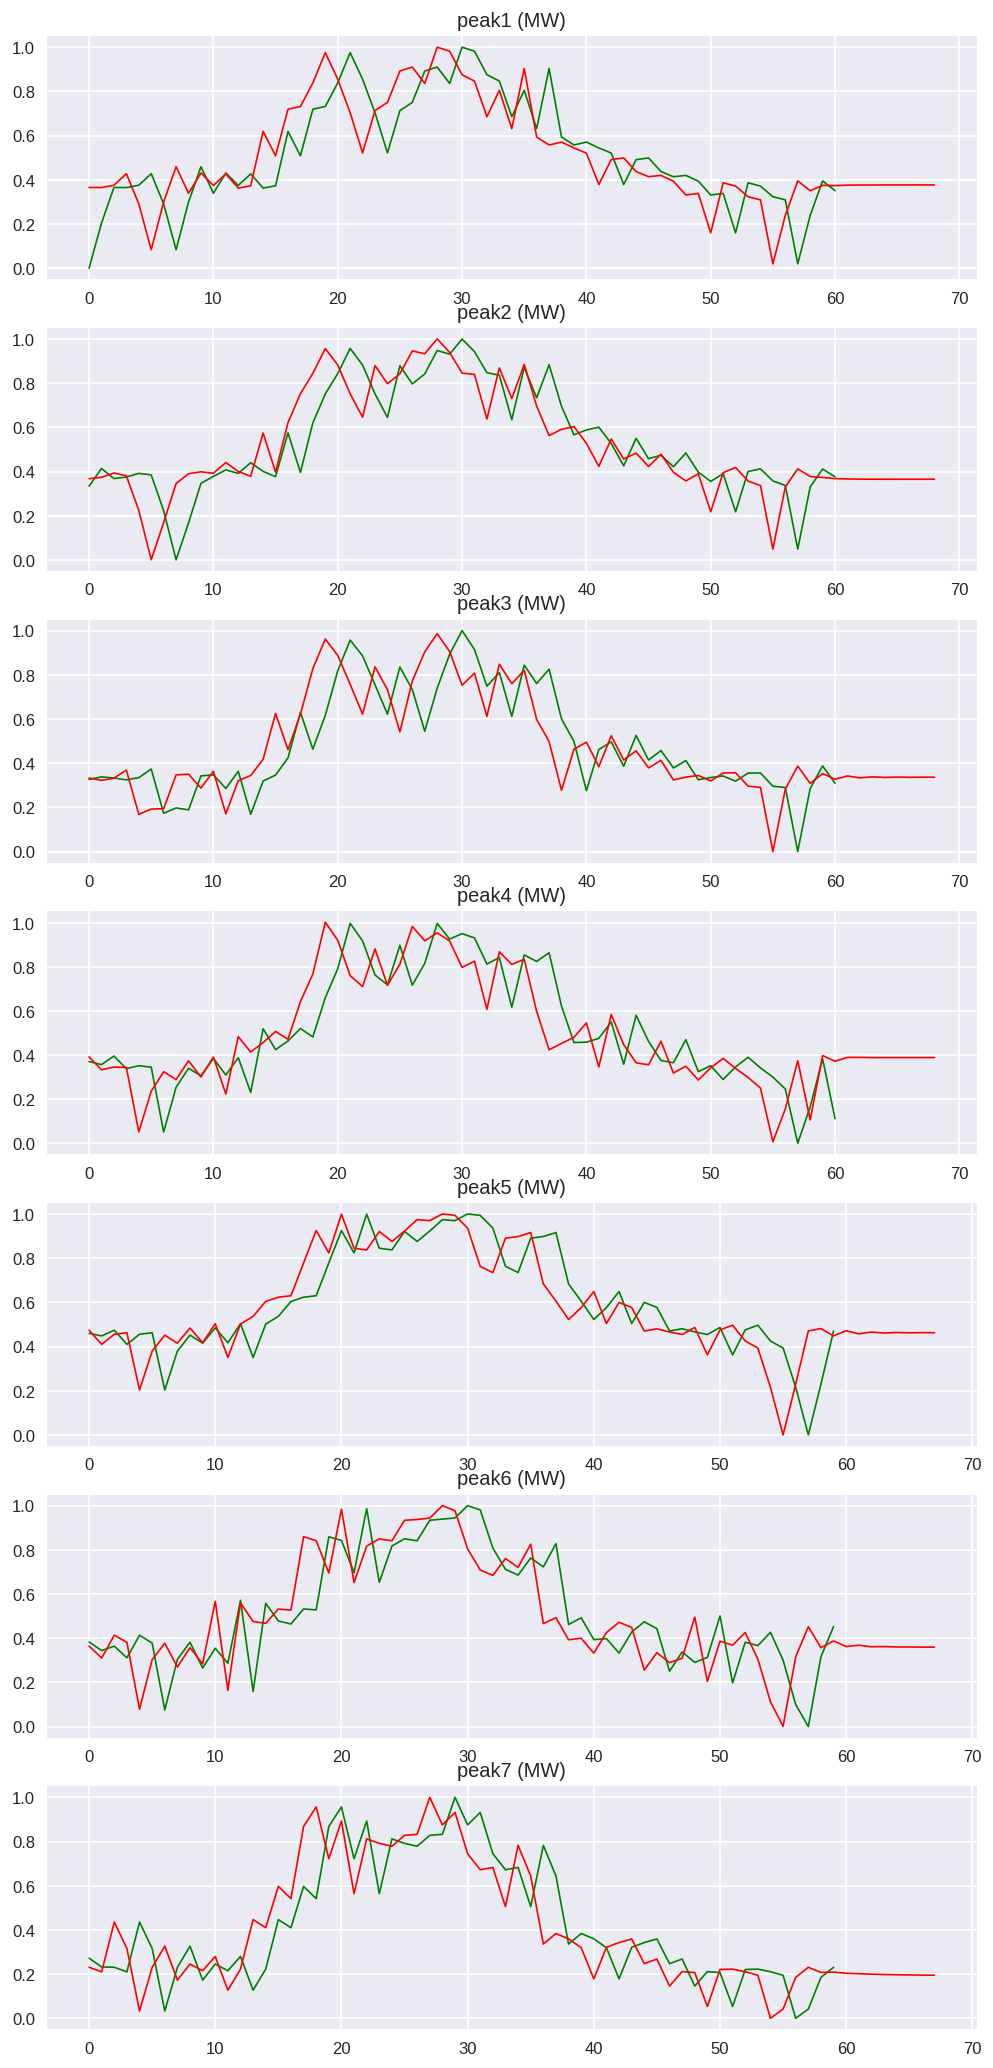

In [28]:
fig2 = plt.figure(figsize=(10,22),dpi=120)
ax1 = fig2.add_subplot(7,1,1)
ax2 = fig2.add_subplot(7,1,2)
ax3 = fig2.add_subplot(7,1,3)
ax4 = fig2.add_subplot(7,1,4)
ax5 = fig2.add_subplot(7,1,5)
ax6 = fig2.add_subplot(7,1,6)
ax7 = fig2.add_subplot(7,1,7)

ax1.plot(peak1, lw=1, c='g', label='real')
ax1.plot(p1, lw=1, c='r', label='prediction')
ax1.set_title('peak1 (MW)')

ax2.plot(peak2, lw=1, c='g', label='real')
ax2.plot(p2, lw=1, c='r', label='prediction')
ax2.set_title('peak2 (MW)')

ax3.plot(peak3, lw=1, c='g', label='real')
ax3.plot(p3, lw=1, c='r', label='prediction')
ax3.set_title('peak3 (MW)')

ax4.plot(peak4, lw=1, c='g', label='real')
ax4.plot(p4, lw=1, c='r', label='prediction')
ax4.set_title('peak4 (MW)')

ax5.plot(peak5, lw=1, c='g', label='real')
ax5.plot(p5, lw=1, c='r', label='prediction')
ax5.set_title('peak5 (MW)')

ax6.plot(peak6, lw=1, c='g', label='real')
ax6.plot(p6, lw=1, c='r', label='prediction')
ax6.set_title('peak6 (MW)')

ax7.plot(peak7, lw=1, c='g', label='real')
ax7.plot(p7, lw=1, c='r', label='prediction')
ax7.set_title('peak7 (MW)')
fig2.show()

# 設 4/2~4/8 之 datetime 並使用 getPrediction 從預測值數列中找出預測值

In [29]:
perdecteDays = np.array([datetime(2019, 4, 2+i).date() for i in range(7)])

print(perdecteDays)

[datetime.date(2019, 4, 2) datetime.date(2019, 4, 3)
 datetime.date(2019, 4, 4) datetime.date(2019, 4, 5)
 datetime.date(2019, 4, 6) datetime.date(2019, 4, 7)
 datetime.date(2019, 4, 8)]


In [0]:
def getPrediction(Date):
  global p1,p2,p3,p4,p5,p6,p7
  global Peak1,Peak2,Peak3,Peak4,Peak5,Peak6,Peak7
  begin = datetime(2018, 1, 1).date()
  i = int((Date-begin).days/7)
  w = Date.weekday() + 1
  #print(i)
  if(w==1):
    return de_normalization(Peak1,p1[i])
  elif(w==2):
    return de_normalization(Peak2,p2[i])
  elif(w==3):
    return de_normalization(Peak3,p3[i])
  elif(w==4):
    return de_normalization(Peak4,p4[i])
  elif(w==5):
    return de_normalization(Peak5,p5[i])
  elif(w==6):
    return de_normalization(Peak6,p6[i])
  elif(w==7):
    return de_normalization(Peak7,p7[i])
  else:
    return 0

# 在特殊假日增加用電量，並存檔成 submission.csv

In [31]:

save  = [['date','peak_load(MW)']]


specialDay = [datetime(2019, 4, 5).date()]

for pre in range(len(perdecteDays)):
  if perdecteDays[pre] in specialDay:
    get = getPrediction(perdecteDays[pre])+1000.
  else:
    get = getPrediction(perdecteDays[pre])
  
  save.append([format(perdecteDays[pre]),int(get)])
  print(get)

28243.705231755972
28398.875760614872
28988.24970561266
29295.42988112569
25847.560526013374
24426.501789212227
28413.341248512268


In [0]:
df = pd.DataFrame(save) 
  
df.to_csv('submission.csv',header=False,index=False) 